In [1]:
#import the libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

In [2]:
dataset = pd.read_csv("Dataset.csv")
dataset.head()
dataset.dtypes

REF_DATE                                                  int64
GEO                                                      object
DGUID                                                    object
Trading Partner                                          object
North American Product Classification System (NAPCS)     object
Trade                                                    object
UOM                                                      object
UOM_ID                                                    int64
SCALAR_FACTOR                                            object
SCALAR_ID                                                 int64
VECTOR                                                   object
COORDINATE                                               object
VALUE                                                   float64
STATUS                                                  float64
SYMBOL                                                  float64
TERMINATED                              

In [3]:
#checking the percentage of missing values in each variable

dataset.isnull().sum()/len(dataset)*100

REF_DATE                                                  0.0
GEO                                                       0.0
DGUID                                                     0.0
Trading Partner                                           0.0
North American Product Classification System (NAPCS)      0.0
Trade                                                     0.0
UOM                                                       0.0
UOM_ID                                                    0.0
SCALAR_FACTOR                                             0.0
SCALAR_ID                                                 0.0
VECTOR                                                    0.0
COORDINATE                                                0.0
VALUE                                                     0.0
STATUS                                                  100.0
SYMBOL                                                  100.0
TERMINATED                                              100.0
DECIMALS

In [4]:
dataset = dataset.drop('SYMBOL', 1)

C:\Users\visha\AppData\Local\Temp/ipykernel_10008/2156671949.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dataset = dataset.drop('SYMBOL', 1)


In [5]:
dataset = dataset.drop('STATUS', 1)

C:\Users\visha\AppData\Local\Temp/ipykernel_10008/525946873.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dataset = dataset.drop('STATUS', 1)


In [6]:
dataset = dataset.drop('TERMINATED', 1)

C:\Users\visha\AppData\Local\Temp/ipykernel_10008/2468267595.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dataset = dataset.drop('TERMINATED', 1)


In [7]:
dataset.isnull().sum()/len(dataset)*100

REF_DATE                                                0.0
GEO                                                     0.0
DGUID                                                   0.0
Trading Partner                                         0.0
North American Product Classification System (NAPCS)    0.0
Trade                                                   0.0
UOM                                                     0.0
UOM_ID                                                  0.0
SCALAR_FACTOR                                           0.0
SCALAR_ID                                               0.0
VECTOR                                                  0.0
COORDINATE                                              0.0
VALUE                                                   0.0
DECIMALS                                                0.0
dtype: float64

In [8]:
#check if any are more than the threshold
null_percentages = dataset.isnull().sum()/len(dataset)*100

#saving column names in a variable
features = dataset.columns
feature = [ ]

for i in range(0, len(null_percentages)):
    if null_percentages[i] <= 20: #setting the threshold values i.e. 20%
        feature.append(features[i])

In [9]:
trading_partner_code, uniques1 = pd.factorize(dataset['Trading Partner'])
napcs_code, uniques2 = pd.factorize(dataset['North American Product Classification System (NAPCS)'])
trade_code, uniques3 = pd.factorize(dataset['Trade'])
vector_code, uniques4 = pd.factorize(dataset['VECTOR'])
coordinate_code, uniques5 = pd.factorize(dataset['COORDINATE'])


In [10]:
dataset['Trading Partner'] = trading_partner_code
dataset['North American Product Classification System (NAPCS)'] = napcs_code
dataset['Trade'] = trade_code
dataset['VECTOR'] = vector_code
dataset['COORDINATE'] = coordinate_code

In [11]:
dataset.head()

,REF_DATE,GEO,DGUID,Trading Partner,North American Product Classification System (NAPCS),Trade,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,DECIMALS
0,2015,Canada,2016A000011124,0,0,0,Dollars,81,thousands,3,0,0,145.7,1
1,2015,Canada,2016A000011124,0,0,1,Dollars,81,thousands,3,1,1,139.4,1
2,2015,Canada,2016A000011124,0,1,0,Dollars,81,thousands,3,2,2,0.0,1
3,2015,Canada,2016A000011124,0,1,1,Dollars,81,thousands,3,3,3,0.0,1
4,2015,Canada,2016A000011124,0,2,0,Dollars,81,thousands,3,4,4,0.0,1


## LOW VARIANCE

In [12]:
#check the variance

dataset.var()

C:\Users\visha\AppData\Local\Temp/ipykernel_10008/2849960425.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.var()


REF_DATE                                                4.000093e+00
Trading Partner                                         5.504127e+03
North American Product Classification System (NAPCS)    1.191694e+01
Trade                                                   2.500058e-01
UOM_ID                                                  0.000000e+00
SCALAR_ID                                               0.000000e+00
VECTOR                                                  3.170425e+06
COORDINATE                                              3.170425e+06
VALUE                                                   5.828259e+12
DECIMALS                                                0.000000e+00
dtype: float64

In [13]:
#density has the least variance which is very less when compared to other variables so we can safelt drop this 

dataset = dataset.drop(['UOM_ID'], axis =1)
dataset = dataset.drop(['SCALAR_ID'], axis =1)
dataset = dataset.drop(['DECIMALS'], axis =1)

In [14]:
#checking the correlation
dataset.corr()

,REF_DATE,Trading Partner,North American Product Classification System (NAPCS),Trade,VECTOR,COORDINATE,VALUE
REF_DATE,1.000000e+00,-2.226492e-13,-6.580511e-15,-9.152603e-17,-2.346232e-13,-2.346232e-13,0.003223
Trading Partner,-2.226492e-13,1.000000e+00,-6.244496e-16,3.726644e-19,9.999924e-01,9.999924e-01,0.068940
North American Product Classification System (NAPCS),-6.580511e-15,-6.244496e-16,1.000000e+00,-2.383639e-19,3.877517e-03,3.877517e-03,0.006775
Trade,-9.152603e-17,3.726644e-19,-2.383639e-19,1.000000e+00,2.808124e-04,2.808124e-04,0.000658
VECTOR,-2.346232e-13,9.999924e-01,3.877517e-03,2.808124e-04,1.000000e+00,1.000000e+00,0.068966
COORDINATE,-2.346232e-13,9.999924e-01,3.877517e-03,2.808124e-04,1.000000e+00,1.000000e+00,0.068966
VALUE,3.222872e-03,6.894031e-02,6.775393e-03,6.582759e-04,6.896625e-02,6.896625e-02,1.000000


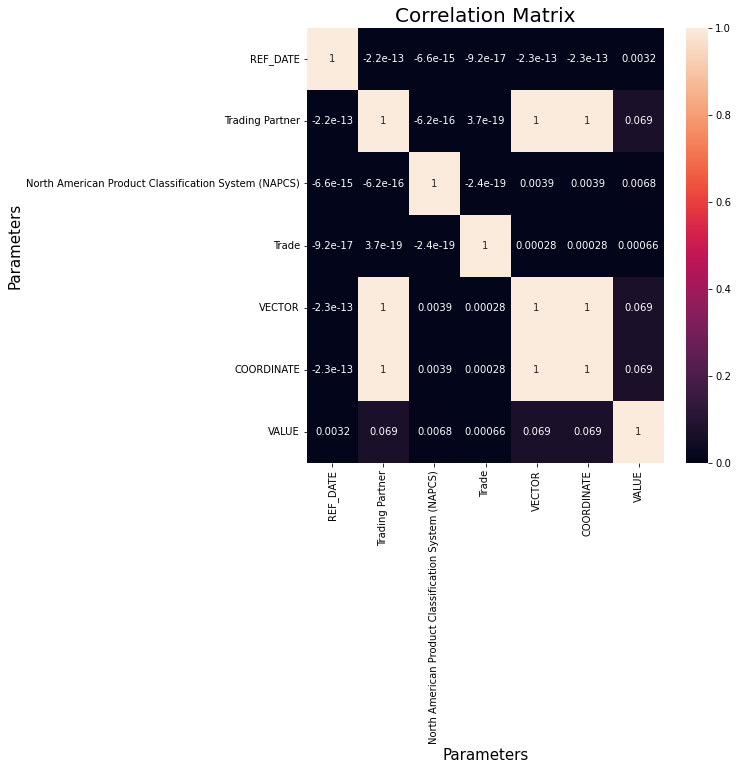

In [15]:
#making a heatmap

plt.figure(figsize = (8,8))
sns.heatmap(dataset.corr(), annot = True)
plt.title('Correlation Matrix', fontsize = 20)
plt.xlabel('Parameters', fontsize = 15)
plt.ylabel('Parameters', fontsize = 15)
plt.show()

In [16]:
dataset = dataset.drop(['VECTOR'], axis=1)
dataset = dataset.drop(['COORDINATE'], axis=1)

In [17]:
dataset.head()

,REF_DATE,GEO,DGUID,Trading Partner,North American Product Classification System (NAPCS),Trade,UOM,SCALAR_FACTOR,VALUE
0,2015,Canada,2016A000011124,0,0,0,Dollars,thousands,145.7
1,2015,Canada,2016A000011124,0,0,1,Dollars,thousands,139.4
2,2015,Canada,2016A000011124,0,1,0,Dollars,thousands,0.0
3,2015,Canada,2016A000011124,0,1,1,Dollars,thousands,0.0
4,2015,Canada,2016A000011124,0,2,0,Dollars,thousands,0.0


## RANDOM FOREST

In [18]:
#convert the type category into numerical data - ordinal encoding

dataset = dataset.replace('Canada', 0)
dataset = dataset.replace('Other', 1)
dataset = dataset.replace('Dollars', 0)
dataset = dataset.replace('thousands', 0)
dataset = dataset.replace('2016A000011124', 0)

In [19]:
dataset.head()

,REF_DATE,GEO,DGUID,Trading Partner,North American Product Classification System (NAPCS),Trade,UOM,SCALAR_FACTOR,VALUE
0,2015,0,0,0,0,0,0,0,145.7
1,2015,0,0,0,0,1,0,0,139.4
2,2015,0,0,0,1,0,0,0,0.0
3,2015,0,0,0,1,1,0,0,0.0
4,2015,0,0,0,2,0,0,0,0.0


In [20]:
#drop the target variable type and load this data into another dataframe

df = dataset.drop(['VALUE'], axis = 1)

In [21]:
#import the package for random forest

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=1, max_depth=10)
model.fit(df, dataset.VALUE)

RandomForestRegressor(max_depth=10, random_state=1)

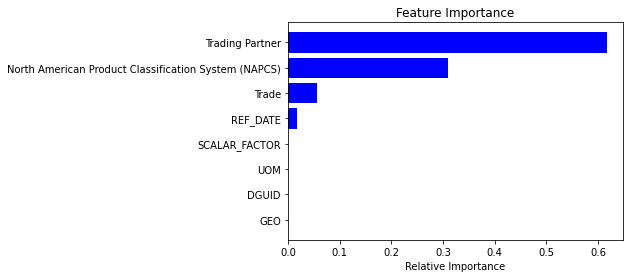

In [22]:
#build the graph to check feature importance

features = df.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-10:] #top 10 features
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='b', align ='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [23]:
#drop the target variable type and load this data into another dataframe

df = df.drop(['SCALAR_FACTOR'], axis = 1)
df = df.drop(['UOM'], axis = 1)
df = df.drop(['DGUID'], axis = 1)
df = df.drop(['GEO'], axis = 1)

In [24]:
df.head()

,REF_DATE,Trading Partner,North American Product Classification System (NAPCS),Trade
0,2015,0,0,0
1,2015,0,0,1
2,2015,0,1,0
3,2015,0,1,1
4,2015,0,2,0


## Backward Feature Reduction

In [25]:
#import the feature selection libraries and linear regression libraries

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

lreg = LinearRegression()
rfe = RFE(lreg, n_features_to_select = 7)
rfe = rfe.fit(df, dataset.VALUE)

In [26]:
x_rfe = df[df.columns[rfe.support_]]
print(x_rfe.columns)

Index(['REF_DATE', 'Trading Partner',
       'North American Product Classification System (NAPCS)', 'Trade'],
      dtype='object')


## Forward Reduction

In [27]:
#import the required libraries for forward selection

from sklearn.feature_selection import f_regression
ffs = f_regression(x_rfe, dataset.VALUE)

In [28]:
#Take the top most variables after the forward selection process

final_features = [ ]
for i in range(0,len(x_rfe.columns)-1):
    if ffs[0][i] >=10:
        final_features.append(df.columns[i])

In [29]:
final_features

['Trading Partner']

## Linear Regression

In [30]:
#import the sklearn for data set, linear regression model and also to split the train and test data

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [31]:
#clearly the target value column is missing lets add that column

df['VALUE'] = dataset['VALUE'].astype(np.int64)
print(df.head())

   REF_DATE  Trading Partner  \
0      2015                0   
1      2015                0   
2      2015                0   
3      2015                0   
4      2015                0   

   North American Product Classification System (NAPCS)  Trade  VALUE  
0                                                  0         0    145  
1                                                  0         1    139  
2                                                  1         0      0  
3                                                  1         1      0  
4                                                  2         0      0  


In [32]:
# compute the pair wise correlation for all columns for feature extraction

correlation_matrix = df.corr().round(2)
print(correlation_matrix)

                                                    REF_DATE  Trading Partner  \
REF_DATE                                                 1.0            -0.00   
Trading Partner                                         -0.0             1.00   
North American Product Classification System (N...      -0.0            -0.00   
Trade                                                   -0.0             0.00   
VALUE                                                    0.0             0.07   

                                                    North American Product Classification System (NAPCS)  \
REF_DATE                                                                                        -0.00      
Trading Partner                                                                                 -0.00      
North American Product Classification System (N...                                               1.00      
Trade                                                                            

Text(0, 0.5, 'VALUE')

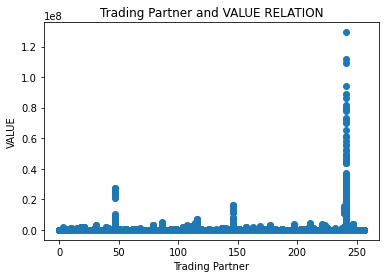

In [33]:
#since the correlation of our target variable MEDV is maximum with the RM let us take look at that feature for consideration

feature = dataset['Trading Partner']
target = dataset['VALUE']
plt.scatter(feature, target, marker='o')
plt.title('Trading Partner and VALUE RELATION')
plt.xlabel('Trading Partner')
plt.ylabel('VALUE')

In [34]:
#data for preparation
#we are taking only RM for demonstrating simple linear regression for more accurate results,
#multiple linear regression can also be considered

x=df[['Trading Partner']]
y=df['VALUE']

In [35]:
# splits the training and test dataset in 80% : 20%
# assign random_state to any value. This ensures consistency

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(34540, 1)
(8636, 1)
(34540,)
(8636,)


In [36]:
#creating the linear regression model

linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

LinearRegression()

Text(0, 0.5, 'Dependent variable')

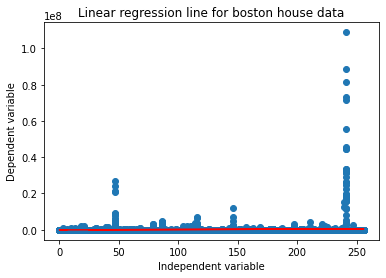

In [37]:
#get the predicted variables and plot the regression line

y_pred = linear_model.predict(X_test)
plt.scatter(X_test, Y_test)
plt.plot(X_test, y_pred, color ='r')
plt.title("Linear regression line for boston house data")
plt.xlabel("Independent variable")
plt.ylabel("Dependent variable")

In [38]:
#performace of the linear model. Gives R2 score

print(linear_model.score(X_test, Y_test))

0.0045051057704259545


In [39]:
print(mean_squared_error(Y_test,y_pred))

7138216079462.531


## Logistic Regression

In [40]:
#import the sklearn for logistic regression model, prediction and performance evaluation purposes

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import metrics

In [41]:
# create a list of our conditions
conditions = [
    (df['VALUE'] <= 183000),
    (df['VALUE'] > 183000)
    ]

# create a list of the values we want to assign for each condition
values = [0, 1] # 0 represents Low value and 1 represents High value

# create a new column and use np.select to assign values to it using our lists as arguments
df['Value_ID'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,REF_DATE,Trading Partner,North American Product Classification System (NAPCS),Trade,VALUE,Value_ID
0,2015,0,0,0,145,0
1,2015,0,0,1,139,0
2,2015,0,1,0,0,0
3,2015,0,1,1,0,0
4,2015,0,2,0,0,0


In [42]:
#Look at the correlation matrix for the maximum correlated variables with the outcome variable

correlation_matrix = df.corr().round(2)
print(correlation_matrix)

                                                    REF_DATE  Trading Partner  \
REF_DATE                                                1.00            -0.00   
Trading Partner                                        -0.00             1.00   
North American Product Classification System (N...     -0.00            -0.00   
Trade                                                  -0.00             0.00   
VALUE                                                   0.00             0.07   
Value_ID                                                0.01             0.03   

                                                    North American Product Classification System (NAPCS)  \
REF_DATE                                                                                        -0.00      
Trading Partner                                                                                 -0.00      
North American Product Classification System (N...                                               1.00      


In [43]:
x = df[['Trading Partner','North American Product Classification System (NAPCS)','Trade']]
#x = df[['Trading Partner']]
y = df.Value_ID

In [44]:
#Making a labels array
labels = ['Trading Partner','North American Product Classification System (NAPCS)','Trade']
#labels = ['Trading Partner']

In [45]:
print(x.max())
print(x.min())

Trading Partner                                         256
North American Product Classification System (NAPCS)     11
Trade                                                     1
dtype: int64
Trading Partner                                         0
North American Product Classification System (NAPCS)    0
Trade                                                   0
dtype: int64


In [46]:
#Do the normalization on the data for more easier convergence

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scaled)

In [47]:
df.head()

,REF_DATE,Trading Partner,North American Product Classification System (NAPCS),Trade,VALUE,Value_ID
0,2015,0,0,0,145,0
1,2015,0,0,1,139,0
2,2015,0,1,0,0,0
3,2015,0,1,1,0,0
4,2015,0,2,0,0,0


In [48]:
X.head()

,0,1,2
0,0.0,0.000000,0.0
1,0.0,0.000000,1.0
2,0.0,0.090909,0.0
3,0.0,0.090909,1.0
4,0.0,0.181818,0.0


In [49]:
#80% is train data and 20% is test data

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [50]:
df.dtypes

REF_DATE                                                int64
Trading Partner                                         int64
North American Product Classification System (NAPCS)    int64
Trade                                                   int64
VALUE                                                   int64
Value_ID                                                int32
dtype: object

In [51]:
# instatiate the model (using the default parameters)
logistic_regression = LogisticRegression()

#fit the model with data
logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [52]:
#Do the prediction for the test data
y_pred = logistic_regression.predict(X_test)

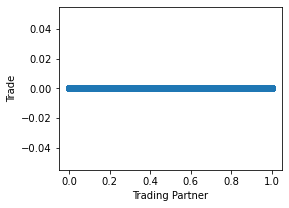

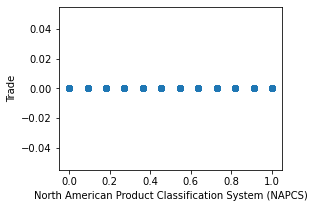

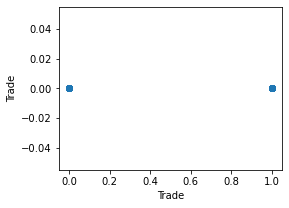

In [53]:
#visualising the graph of every variable against the outcome variable

for i in range(3):
    plt.figure(i, figsize = (4,3))
    plt.xlabel(labels[i])
    ax=sns.regplot(x=X_test[i], y = y_pred, data=df, logistic = True, ci=None, line_kws={'color':'red'})
    ax.set(xlabel=labels[i],ylabel='Trade')
    plt.show()

In [54]:
#Look at the confusion matrix

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[8086    0]
 [ 550    0]]


Text(0.5, 15.0, 'Predicted label')

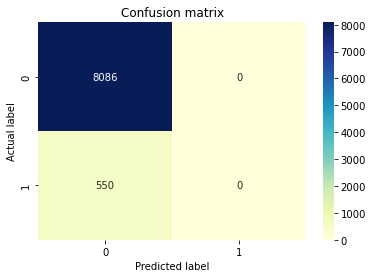

In [55]:
#visualising the confusion matrix by creating a heatmap

# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [56]:
#Looking at the performace of the model

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.9363131079203335
Precision: 0.0
Recall: 0.0


C:\Users\visha\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## K Cluster Analysis

In [57]:
# Import the required libraries

import sklearn.metrics as sm
from sklearn.cluster import KMeans
from sklearn import datasets

In [58]:
#Look at the features of the dataset

df.keys()

Index(['REF_DATE', 'Trading Partner',
       'North American Product Classification System (NAPCS)', 'Trade',
       'VALUE', 'Value_ID'],
      dtype='object')

In [59]:
new_df = df.drop(['Value_ID'], axis = 1)
new_df = new_df.drop(['VALUE'], axis = 1)
x = new_df

In [60]:
y = df['Value_ID']

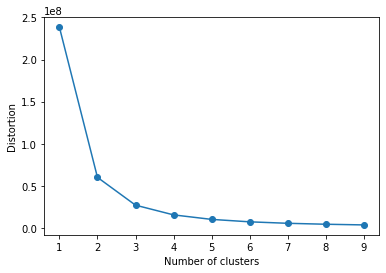

In [61]:
# calculate distortion for a range of number of cluster

distortions = []
for i in range(1, 10):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)
    
#plot
plt.plot(range(1,10), distortions, marker ='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [62]:
model = KMeans(n_clusters=3)
model.fit(x)

KMeans(n_clusters=3)

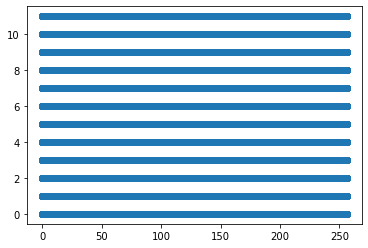

In [63]:
plt.scatter(x['Trading Partner'], x['North American Product Classification System (NAPCS)'])

In [64]:
colormap = np.array(['Red', 'green', 'blue'])

Text(0.5, 1.0, 'Classification K-means')

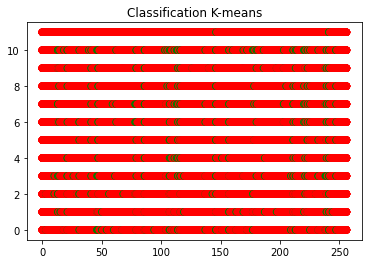

In [65]:
#Checking the graph of predicted labels

plt.scatter(x['Trading Partner'], x['North American Product Classification System (NAPCS)'], c=colormap[y], s=40)
plt.title('Classification K-means')

In [66]:
#To get the centroids of the clusters

model.cluster_centers_

array([[2.018e+03, 2.145e+02, 5.500e+00, 5.000e-01],
       [2.018e+03, 4.300e+01, 5.500e+00, 5.000e-01],
       [2.018e+03, 1.295e+02, 5.500e+00, 5.000e-01]])

In [67]:
model.labels_

array([1, 1, 1, ..., 0, 0, 0])

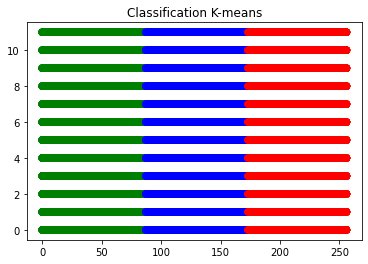

In [68]:
#Visualization of the classification of the labels predicted by the model

plt.scatter(x['Trading Partner'], x['North American Product Classification System (NAPCS)'], c=colormap[model.labels_], s=40)
plt.title('Classification K-means')
plt.show()

In [69]:
model.predict(x)

array([1, 1, 1, ..., 0, 0, 0])

In [70]:
y_km=model.labels_

K-means is not a classification tool so analyzing accuracy is not a good idea. Thus, I would not use it for predicting target variable.

## Decision Tree

In [71]:
#data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

#importing the decision tree module

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [72]:
X = new_df
y = df['Value_ID']

In [73]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(34540, 4)
(8636, 4)
(34540,)
(8636,)


In [74]:
#create the decision tree classifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [75]:
#predicting with the test data

Y_pred = decision_tree.predict(X_test)
print(Y_pred)

[0 0 0 ... 0 0 0]


In [76]:
#printing the accuracy score of the model

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print(acc_decision_tree)

100.0


In [77]:
#Visualize the Decision Tree

from sklearn.datasets import load_iris
from sklearn import tree

In [78]:
#Make feature_names array and class_names array

fn=['REF_DATE', 'Trading Partner', 'North American Product Classification System (NAPCS)', 'Trade']
cn = ['High value', 'Low value']

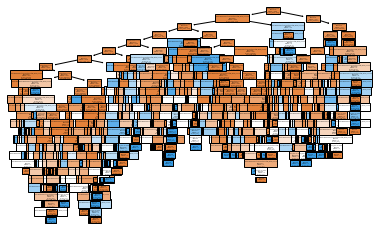

In [79]:
tree.plot_tree(decision_tree,
               feature_names = fn,
               class_names = cn,
               filled = True);

In [80]:
tree.export_graphviz(decision_tree,
                     out_file = "tree.dot",
                     feature_names = fn,
                     class_names = cn,
                     filled = True)

## SVM

In [81]:
#Import the required modules from the sklearn for model building, evaluating performance

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [82]:
x = new_df
y = df['Value_ID']

In [83]:
#Split the data into training and testing data

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2)

In [84]:
#Create the SVM model

SVM = SVC(kernel = 'linear', random_state = 0)

#Fit the model for the data
SVM.fit(X_train, Y_train.values.ravel()) #.ravel()

SVC(kernel='linear', random_state=0)

In [85]:
#Make the prediction

y_pred = SVM.predict(X_test)

In [86]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [87]:
#Performance evaluation using confusion matrix

confusion_matrix = confusion_matrix(Y_test, y_pred)
print(confusion_matrix)

[[8110    0]
 [ 526    0]]


In [88]:
cm_df = pd.DataFrame(confusion_matrix, index = ['Low value', 'High value'], columns = ['Low value', 'High value'])

Text(33.0, 0.5, 'Actual Values')

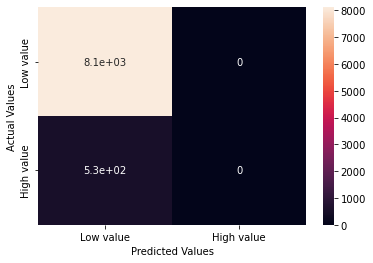

In [89]:
p = sns.heatmap(cm_df, annot = True)

p.set_xlabel('Predicted Values', fontsize=10)
p.set_ylabel('Actual Values', fontsize=10)

<AxesSubplot:>

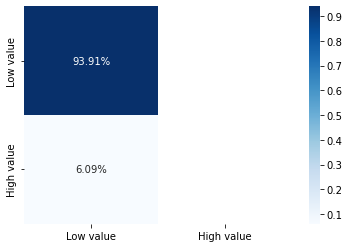

In [90]:
sns.heatmap(cm_df/np.sum(cm_df), annot=True, fmt='.2%', cmap='Blues')

In [ ]:
accuracy = cross_val_score(estimator = SVM, X = X_train, y = Y_train.values.ravel(), cv=10)

print('Accuracy: {:.2f}%'.format(accuracy.mean()*100))
print('Standard Deviation:{:.2f}%'.format(accuracy.std()*100))